In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation


In [2]:
# Training Set 
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, vertical_flip=True, horizontal_flip=True)
train_set = train_datagen.flow_from_directory(r'C:\Users\EliteBook 840 G7\Desktop\My_Projects\Deep_Learning\Monkey_Breed\training\training',
                                             target_size=(224,224), class_mode='categorical', batch_size=16)

Found 1098 images belonging to 10 classes.


In [3]:
#Test Set
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(r'C:\Users\EliteBook 840 G7\Desktop\My_Projects\Deep_Learning\Monkey_Breed\validation\validation',
                                           target_size=(224,224), class_mode='categorical', batch_size=16)

Found 272 images belonging to 10 classes.


# CNN model


In [4]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax')) #softmax is better for categorical data

In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               1

# Lets Train

In [19]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(train_set, validation_data=test_set, epochs=10)

Epoch 1/10
69/69 [==============================] - 96s 1s/step - loss: 2.2950 - accuracy: 0.2240 - val_loss: 1.7291 - val_accuracy: 0.3346
Epoch 2/10
69/69 [==============================] - 81s 1s/step - loss: 1.6832 - accuracy: 0.4007 - val_loss: 1.7060 - val_accuracy: 0.3934
Epoch 3/10
69/69 [==============================] - 84s 1s/step - loss: 1.4355 - accuracy: 0.4690 - val_loss: 1.5860 - val_accuracy: 0.4338
Epoch 4/10
69/69 [==============================] - 86s 1s/step - loss: 1.3606 - accuracy: 0.5228 - val_loss: 1.5151 - val_accuracy: 0.4816
Epoch 5/10
69/69 [==============================] - 83s 1s/step - loss: 1.1939 - accuracy: 0.5801 - val_loss: 1.3585 - val_accuracy: 0.5515
Epoch 6/10
69/69 [==============================] - 84s 1s/step - loss: 1.1330 - accuracy: 0.5956 - val_loss: 1.3589 - val_accuracy: 0.5735
Epoch 7/10
69/69 [==============================] - 77s 1s/step - loss: 1.0225 - accuracy: 0.6548 - val_loss: 1.4720 - val_accuracy: 0.5294
Epoch 8/10
69/69 [==

In [ ]:
#Saving the model
history.model.save(r'The path where to save the model')

# Ploting the model

In [ ]:
import matplotlib.pyplot as plt

acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training Accuaracy')
plt.plot(epochs, acc_val, 'r', label='Validationv Accuaracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'r', label='Validationv Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Testing

In [8]:
import numpy as np 
import os 
from PIL import Image
from tensorflow.keras.preprocessing import image

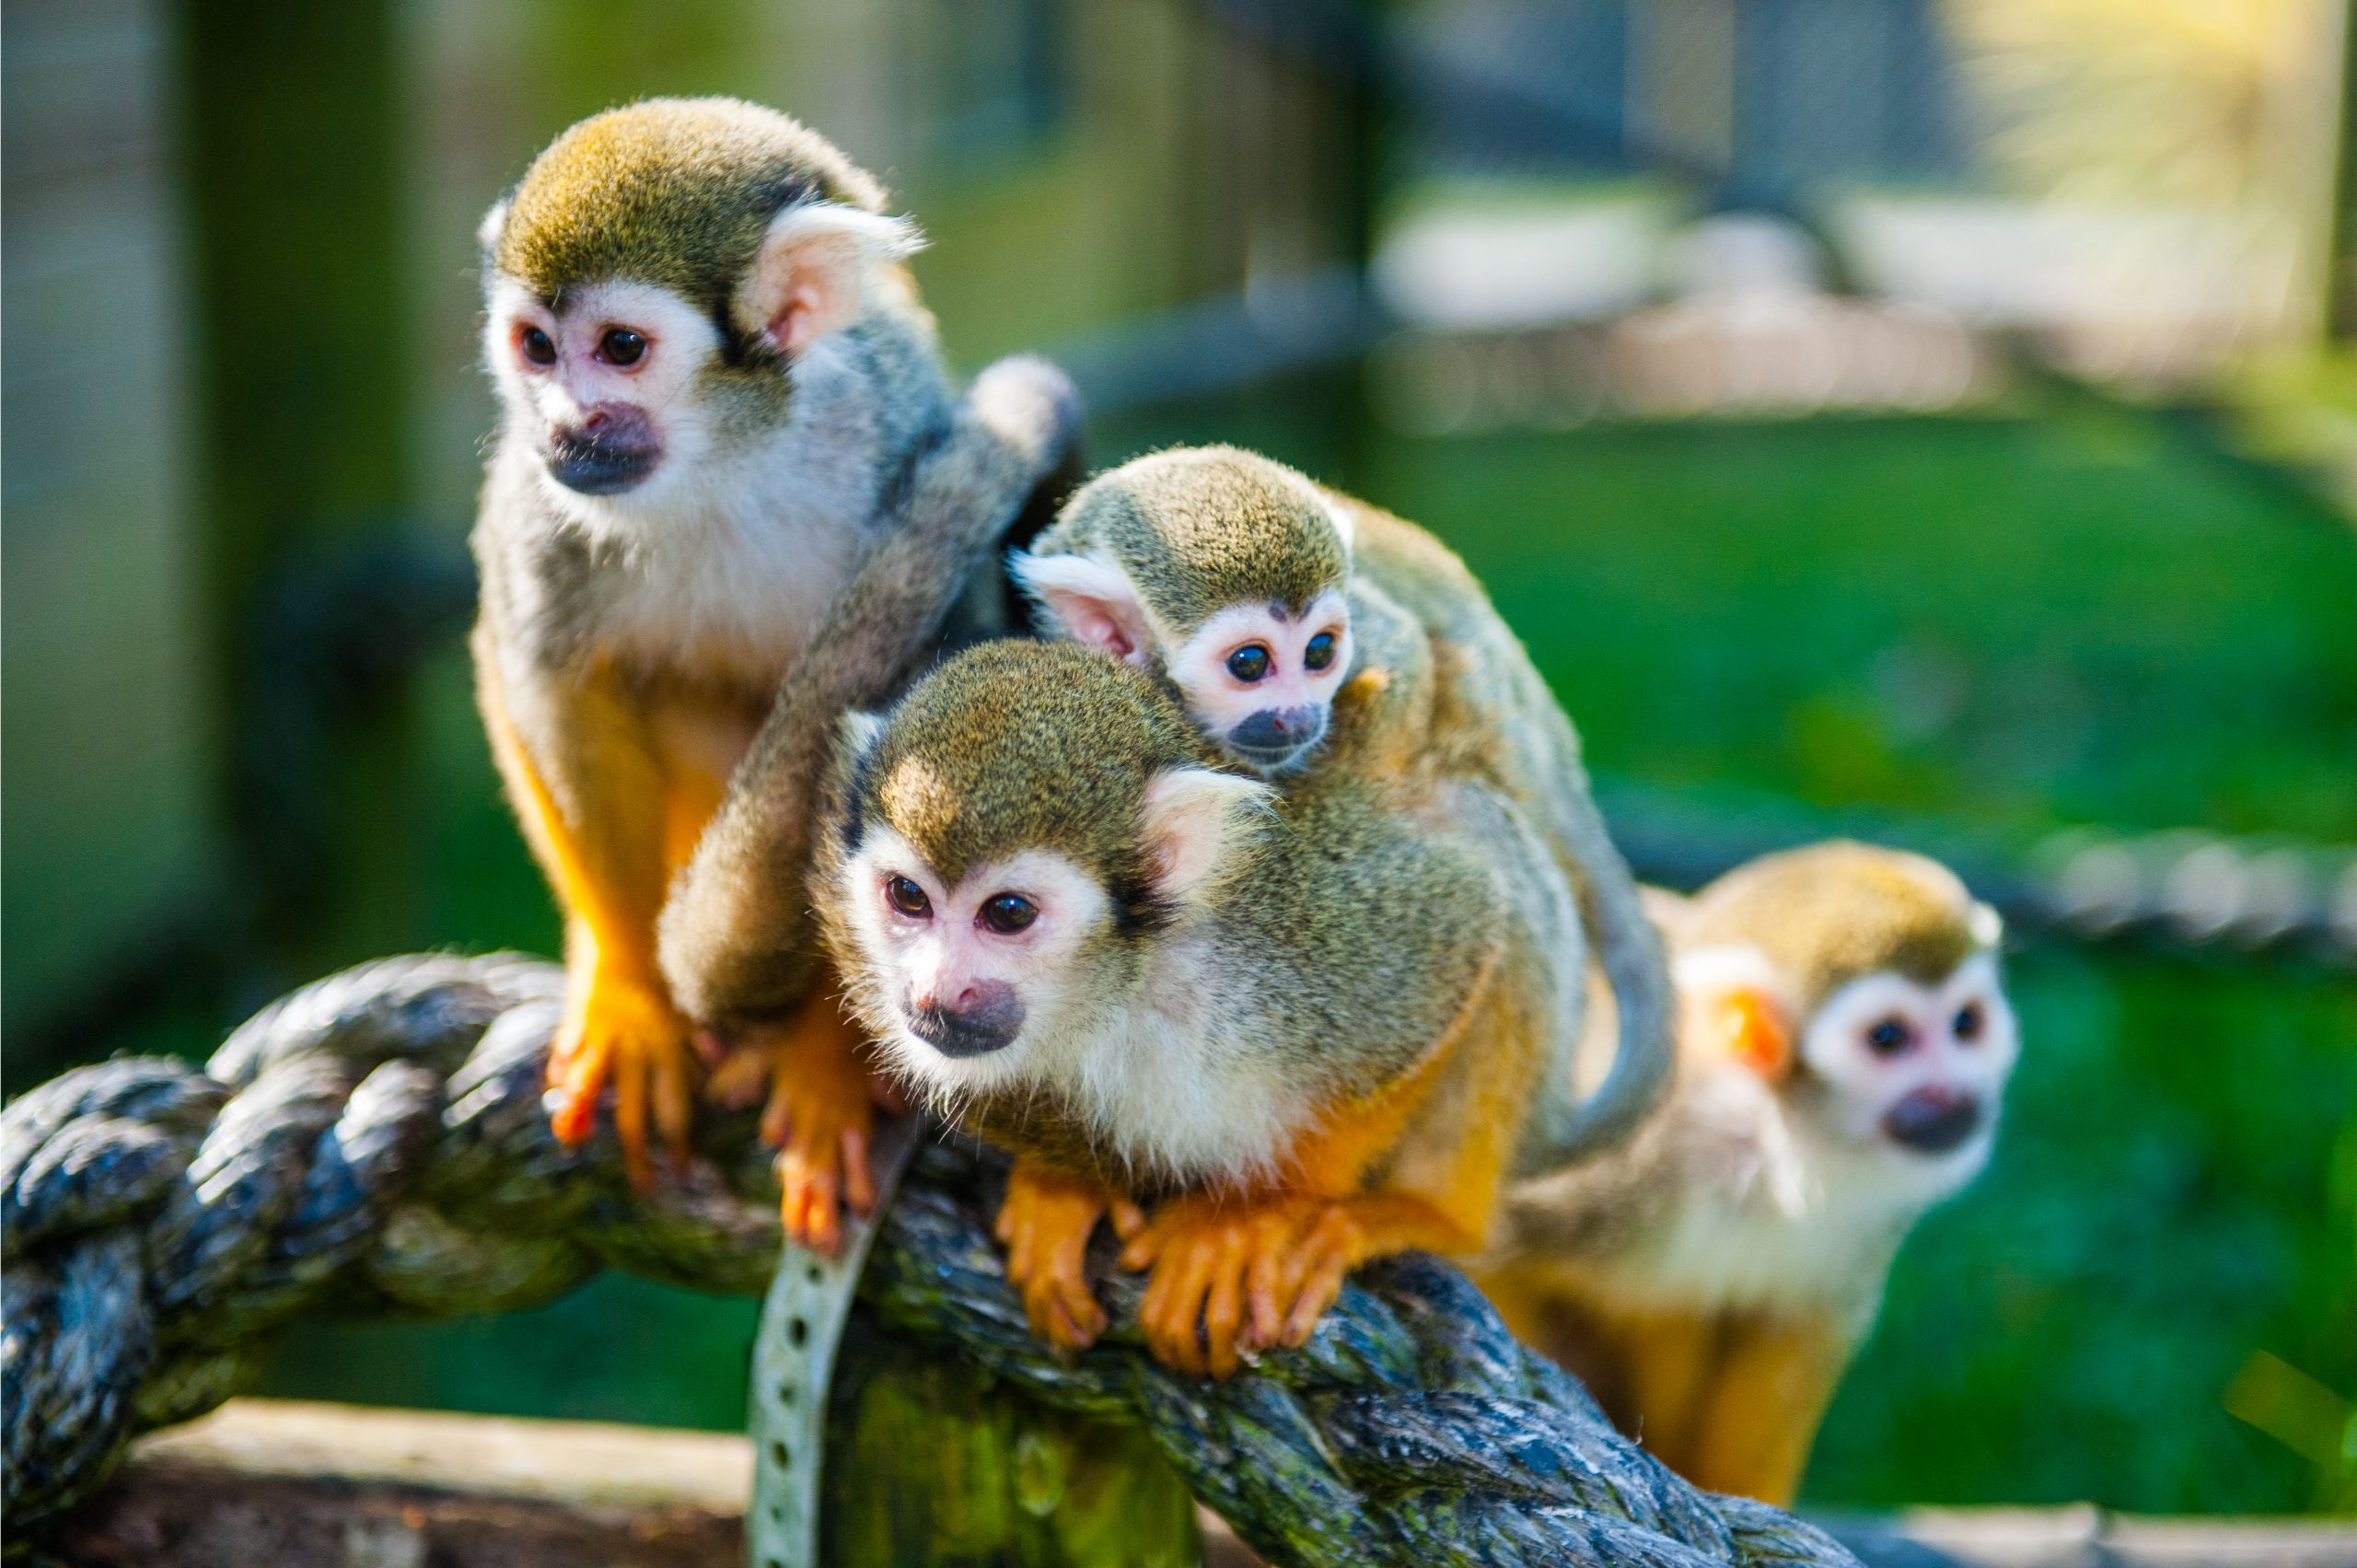

In [9]:
image_path = r'C:\Users\EliteBook 840 G7\Desktop\My_Projects\Deep_Learning\Monkey_Breed\Image_To_Test\monkey_2.jpg'
open_image = Image.open(image_path)
open_image

In [59]:
test_image = image.load_img(image_path, target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis=0)

(1, 224, 224, 3)

In [60]:
res = model.predict(test_image)
res = np.argmax(res)

1/1 [==============================] - 0s 65ms/step


array([[2.3998451e-04, 2.8900421e-01, 4.2974590e-03, 8.7720924e-04,
        9.1178669e-03, 8.3966851e-03, 2.9494765e-03, 6.7675900e-01,
        7.7230423e-03, 6.3503179e-04]], dtype=float32)

In [74]:
import pandas as pd 

txt = pd.read_csv(r'C:\Users\EliteBook 840 G7\Desktop\My_Projects\Deep_Learning\Monkey_Breed\monkey_labels.txt')
txt

Label     Latin Name              Common Name                     \
0  n0         alouatta_palliata\t    mantled_howler                   
1  n1        erythrocebus_patas\t    patas_monkey                     
2  n2        cacajao_calvus\t        bald_uakari                      
3  n3        macaca_fuscata\t        japanese_macaque                 
4  n4       cebuella_pygmea\t        pygmy_marmoset                   
5  n5       cebus_capucinus\t        white_headed_capuchin            
6  n6       mico_argentatus\t        silvery_marmoset                 
7  n7      saimiri_sciureus\t        common_squirrel_monkey           
8  n8       aotus_nigriceps\t        black_headed_night_monkey        
9  n9       trachypithecus_johnii    nilgiri_langur                   

    Train Images    Validation Images  
0             131                  26  
1             139                  28  
2             137                  27  
3             152                  30  
4             131                  26  
5             141                  28  
6             132                  26  
7             142                  28  
8             133                  27  
9             132                  26

In [69]:
Name = txt.iloc[res]
Name = Name.iloc[2]
print(Name)

 common_squirrel_monkey        
